In [6]:
# import all necessary libraries

import numpy as np
import pandas as pd
import random
from math import sqrt
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# read dataset as a dataframe
data=pd.read_csv('flu_data.csv')

# display 5 head rows from dataframe
data.head()

,Student,Vaccin,HndWshQual,HndWshFreq,SociDist,NoFaceContact,RespEttiqu,PersnDist,HandSanit,Risk,Complications,Barriers,Inefficacy,KnowlTrans,KnowlMgmt,Sick,Flu,Female
0,1,3,4,4,2,1,5,1,1,-0.770,-1.453,0.000,0.929,-0.554,0.000,0.0,0.0,1.0
1,2,2,4,4,5,2,5,4,4,-0.345,0.000,-0.489,0.149,-0.554,1.482,1.0,0.0,0.0
2,3,3,2,2,2,3,2,2,1,-0.406,-0.575,-0.234,0.693,-0.182,-1.482,0.0,0.0,0.0
3,4,3,3,2,2,2,5,3,1,-0.575,-0.197,-0.429,0.000,0.554,0.000,2.0,1.0,NaN
4,5,2,5,3,3,2,5,5,3,0.000,-0.770,0.097,0.546,0.554,0.684,1.0,0.0,0.0


In [8]:
# print dataset details
num_samples, num_attributes = data.shape
att_names = list(data.columns)

print("Num of Samples: ", num_samples)
print("Num of Attributes: ", num_attributes)
print("Attribute Names: ", att_names)

Num of Samples:  410
Num of Attributes:  18
Attribute Names:  ['Student', 'Vaccin', 'HndWshQual', 'HndWshFreq', 'SociDist', 'NoFaceContact', 'RespEttiqu', 'PersnDist', 'HandSanit', 'Risk', 'Complications', 'Barriers', 'Inefficacy', 'KnowlTrans', 'KnowlMgmt', 'Sick', 'Flu', 'Female']


In [9]:
data.describe()

,Student,Vaccin,HndWshQual,HndWshFreq,SociDist,NoFaceContact,RespEttiqu,PersnDist,HandSanit,Risk,Complications,Barriers,Inefficacy,KnowlTrans,KnowlMgmt,Sick,Flu,Female
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,409.000000,410.000000,374.000000,374.000000,375.000000
mean,205.500000,3.370732,3.885366,3.226829,2.909756,2.456098,4.102439,3.412195,2.785366,-0.103863,-0.322485,-0.392522,-0.055388,0.054071,0.206666,0.986631,0.208556,0.549333
std,118.501055,1.366423,1.036748,1.155305,1.176025,1.246717,1.250621,1.129012,1.583157,0.485028,0.511090,0.433467,0.515823,0.818013,0.726531,0.656853,0.406821,0.498225
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.453000,-1.453000,-1.868000,-1.696000,-1.393000,-1.482000,0.000000,0.000000,0.000000
25%,103.250000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,-0.376000,-0.575000,-0.658000,-0.400000,-0.554000,-0.335000,1.000000,0.000000,0.000000
50%,205.500000,3.000000,4.000000,3.000000,3.000000,2.000000,5.000000,3.000000,3.000000,0.000000,-0.376000,-0.448000,0.000000,0.182000,0.335000,1.000000,0.000000,1.000000
75%,307.750000,5.000000,5.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000,0.169000,0.000000,-0.206000,0.299750,0.554000,0.684000,1.000000,0.000000,1.000000
max,410.000000,9.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.000000,5.000000,1.453000,1.453000,1.653000,1.696000,1.393000,1.482000,2.000000,1.000000,1.000000


In [10]:
# Check the data types & missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student        410 non-null    int64  
 1   Vaccin         410 non-null    int64  
 2   HndWshQual     410 non-null    int64  
 3   HndWshFreq     410 non-null    int64  
 4   SociDist       410 non-null    int64  
 5   NoFaceContact  410 non-null    int64  
 6   RespEttiqu     410 non-null    int64  
 7   PersnDist      410 non-null    int64  
 8   HandSanit      410 non-null    int64  
 9   Risk           410 non-null    float64
 10  Complications  410 non-null    float64
 11  Barriers       410 non-null    float64
 12  Inefficacy     410 non-null    float64
 13  KnowlTrans     409 non-null    float64
 14  KnowlMgmt      410 non-null    float64
 15  Sick           374 non-null    float64
 16  Flu            374 non-null    float64
 17  Female         375 non-null    float64
dtypes: float64

In [11]:
# Filling Missing Values by mode

cols = ['KnowlTrans', 'Flu', 'Sick', 'Female']
data[cols]=data[cols].fillna(data.mode().iloc[0])

In [12]:
# Check the data types & missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student        410 non-null    int64  
 1   Vaccin         410 non-null    int64  
 2   HndWshQual     410 non-null    int64  
 3   HndWshFreq     410 non-null    int64  
 4   SociDist       410 non-null    int64  
 5   NoFaceContact  410 non-null    int64  
 6   RespEttiqu     410 non-null    int64  
 7   PersnDist      410 non-null    int64  
 8   HandSanit      410 non-null    int64  
 9   Risk           410 non-null    float64
 10  Complications  410 non-null    float64
 11  Barriers       410 non-null    float64
 12  Inefficacy     410 non-null    float64
 13  KnowlTrans     410 non-null    float64
 14  KnowlMgmt      410 non-null    float64
 15  Sick           410 non-null    float64
 16  Flu            410 non-null    float64
 17  Female         410 non-null    float64
dtypes: float64

### 1. K-means clustering with different number of clusters (40 points)

In [13]:
# Define K-Means Clustering Class
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 10 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        
    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
        
    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X) # predict function
        return y_pred, centroids

    # Function to find euclidean distance between two points 
    def findDistance(self, point1, point2):
        
        eucDis = 0
        for i in range(len(point1)):
            eucDis = eucDis + (point1[i] - point2[i])**2
    
        return eucDis**0.5

    # Function to calcualte Dunn Index
    def DunnIndex(self, points, cluster):
      
        # points -- all data points
        # cluster -- cluster centroids

        numer = float('inf')
        for c in cluster: # for each cluster
            for t in cluster: # for each cluster
                if (t == c).all(): continue # if same cluster, ignore
                ndis = self.findDistance(t, c)
              # print('Numerator', numerator, ndis)
                numer = min(numer, ndis) # find distance between centroids
                
        denom = 0
        for c in cluster: # for each cluster
            for p in points: # for each point
                for t in points: # for each point
                    if (t == p).all(): continue # if same point, ignore
                    ddis = self.findDistance(t, p)
                    denom = max(denom, ddis)
                    
        return numer/denom

a. Apply k-means clustering on the Flu dataset with 3 features: 'Risk', 'NoFaceContact', 'Sick', given the number of clusters k = 2. Visualize your clusters using a 3D scatter plot.

In [14]:
X1 = data.loc[:, ['Risk', 'NoFaceContact', 'Sick']]
X = X1.values

print("Dimensions of X: ", X.shape)

Dimensions of X:  (410, 3)


Centroids: 
 [[-0.15969677  3.78709677  1.        ]
 [-0.06992549  1.64705882  0.98039216]]
**Scatter Plot for 2 Clusters**


/var/folders/cv/flgh8s7960bc7q380pyn0c6m0000gn/T/ipykernel_24767/2855843014.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


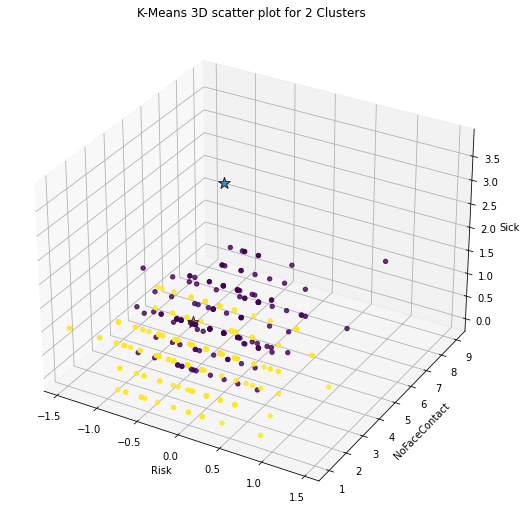

In [10]:
num_clusters = 2 # num of clusters
Kmeans = KMeansClustering(X, num_clusters)
y_pred, centroids = Kmeans.fit(X)
print("Centroids: \n", centroids)

#Display Scatter Plot
print("**Scatter Plot for %d Clusters**" % num_clusters)

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating plot
sctt = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],
                    alpha = 0.8,
                    c = y_pred,
                    marker ='.',
                    s=75)

for i in range(num_clusters):
    ax.scatter3D(centroids[i][0], centroids[i][1], centroids[i][1],
                    alpha = 0.8,
                    marker ='*',
                    s=150, edgecolor='black')

plt.title(f"K-Means 3D scatter plot for {num_clusters} Clusters")
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
 
# show plot
plt.show()

b. Test with different numbers of clusters k, from k = 2 to k = 10. Which one you believe is the best number of clusters? Justify your response. (Hint: you may compare the 3D scatter plots with different numbers of clusters.)

c. Implement Dunn index (DI) validity measure. Repeat experiments in problem 1b and calculate corresponding DI indices. Which one you believe is the best number of clusters using the validity measure? Does it agree with your initial observation in problem 1b?

Centroids: 
 [[-0.06992549  1.64705882  0.98039216]
 [-0.15969677  3.78709677  1.        ]]
Dunn Index: 0.2580
**Scatter Plot for 2 Clusters**


C:\Users\Manasa\AppData\Local\Temp\ipykernel_19444\883955781.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


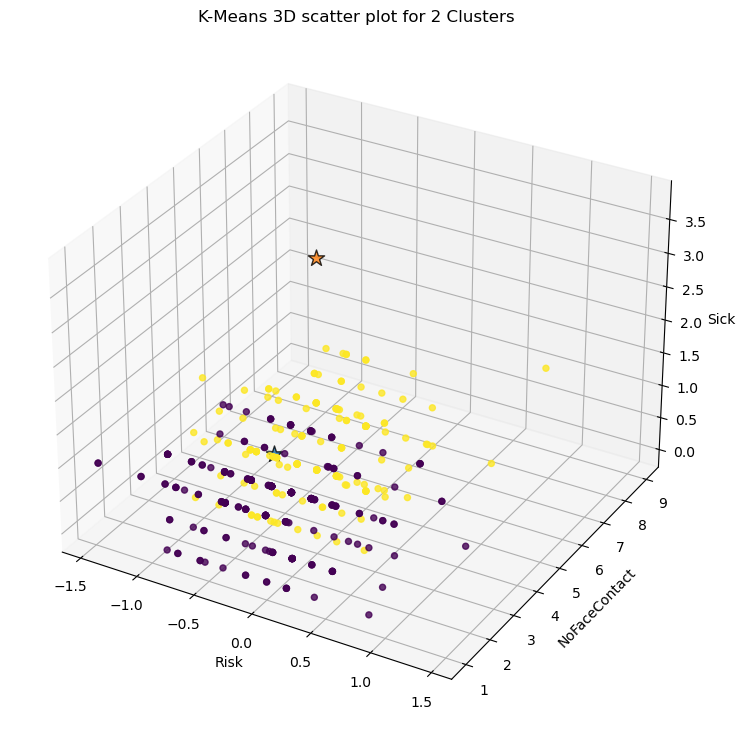

In [15]:
# Apply Clustering & Compute Dunn Index

num_clusters = 2 # num of clusters
Kmeans = KMeansClustering(X, num_clusters)
y_pred, centroids = Kmeans.fit(X)
print("Centroids: \n", centroids)

di2 = Kmeans.DunnIndex(X, centroids)
print("Dunn Index: %.4f" % di2)

#Display Scatter Plot
print("**Scatter Plot for %d Clusters**" % num_clusters)

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating plot
sctt = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],
                    alpha = 0.8,
                    c = y_pred,
                    marker ='.',
                   s=75)

for i in range(num_clusters):
    ax.scatter3D(centroids[i][0], centroids[i][1], centroids[i][1],
                    alpha = 0.8,
                    marker ='*',
                    s=150, edgecolor='black')

plt.title(f"K-Means 3D scatter plot for {num_clusters} Clusters")
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
 
# show plot
plt.show()

Centroids: 
 [[-0.17858442  4.58441558  0.92207792]
 [ 0.11491429  2.58095238  1.46666667]
 [-0.17938158  1.67982456  0.78947368]]
Dunn Index: 0.1403
**Scatter Plot for 3 Clusters**


/var/folders/cv/flgh8s7960bc7q380pyn0c6m0000gn/T/ipykernel_24767/3511504288.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


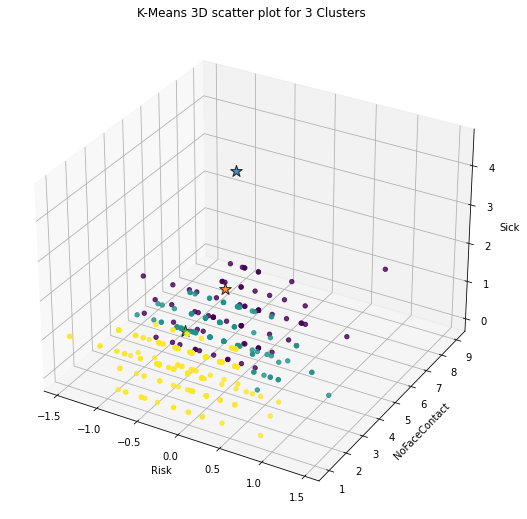

In [12]:
# Apply Clustering & Compute Dunn Index

num_clusters = 3 # num of clusters
Kmeans = KMeansClustering(X, num_clusters)
y_pred, centroids = Kmeans.fit(X)
print("Centroids: \n", centroids)

di3 = Kmeans.DunnIndex(X, centroids)
print("Dunn Index: %.4f" % di3)

#Display Scatter Plot
print("**Scatter Plot for %d Clusters**" % num_clusters)

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating plot
sctt = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],
                    alpha = 0.8,
                    c = y_pred,
                    marker ='.',
                   s=75)

for i in range(num_clusters):
    ax.scatter3D(centroids[i][0], centroids[i][1], centroids[i][1],
                    alpha = 0.8,
                    marker ='*',
                    s=150, edgecolor='black')

plt.title(f"K-Means 3D scatter plot for {num_clusters} Clusters")
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
 
# show plot
plt.show()

Centroids: 
 [[ 8.02439024e-03  4.82926829e+00  1.39024390e+00]
 [-3.86428571e-01  3.95918367e+00  2.85714286e-01]
 [-1.02847162e-01  1.60698690e+00  8.64628821e-01]
 [-4.68131868e-03  2.71428571e+00  1.49450549e+00]]
Dunn Index: 0.1539
**Scatter Plot for 4 Clusters**


C:\Users\Manasa\AppData\Local\Temp\ipykernel_19444\1942706007.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


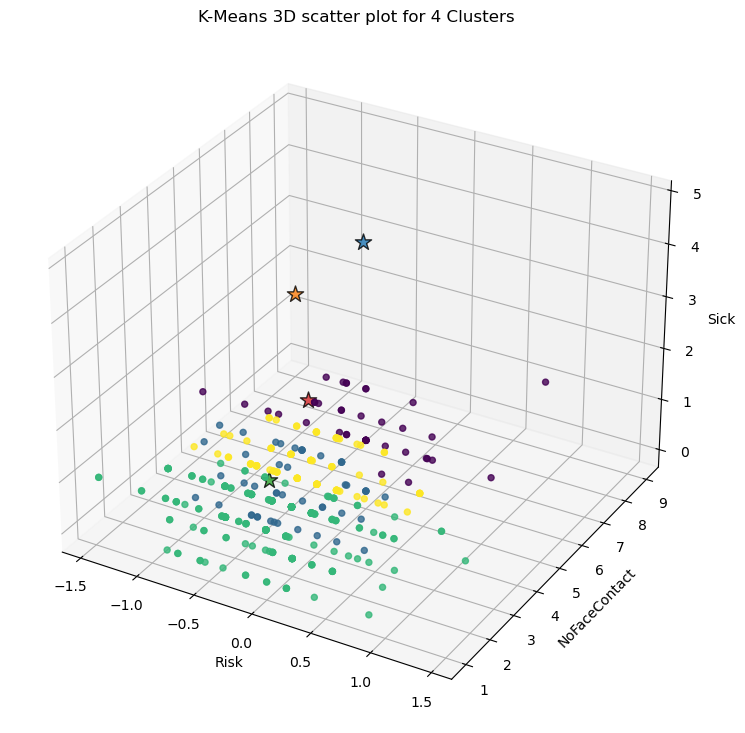

In [16]:
# Apply Clustering & Compute Dunn Index

num_clusters = 4 # num of clusters
Kmeans = KMeansClustering(X, num_clusters)
y_pred, centroids = Kmeans.fit(X)
print("Centroids: \n", centroids)

di4 = Kmeans.DunnIndex(X, centroids)
print("Dunn Index: %.4f" % di4)

#Display Scatter Plot
print("**Scatter Plot for %d Clusters**" % num_clusters)

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating plot
sctt = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],
                    alpha = 0.8,
                    c = y_pred,
                    marker ='.',
                   s=75)

for i in range(num_clusters):
    ax.scatter3D(centroids[i][0], centroids[i][1], centroids[i][1],
                    alpha = 0.8,
                    marker ='*',
                    s=150, edgecolor='black')

plt.title(f"K-Means 3D scatter plot for {num_clusters} Clusters")
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
 
# show plot
plt.show()

Centroids: 
 [[-0.23647541  4.62295082  0.63934426]
 [-0.16062437  2.29949239  0.7715736 ]
 [ 0.06045714  3.65714286  2.        ]
 [ 0.35138636  1.61363636  1.97727273]
 [-0.19305479  1.          0.78082192]]
Dunn Index: 0.1566
**Scatter Plot for 5 Clusters**


/var/folders/cv/flgh8s7960bc7q380pyn0c6m0000gn/T/ipykernel_24767/380891589.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


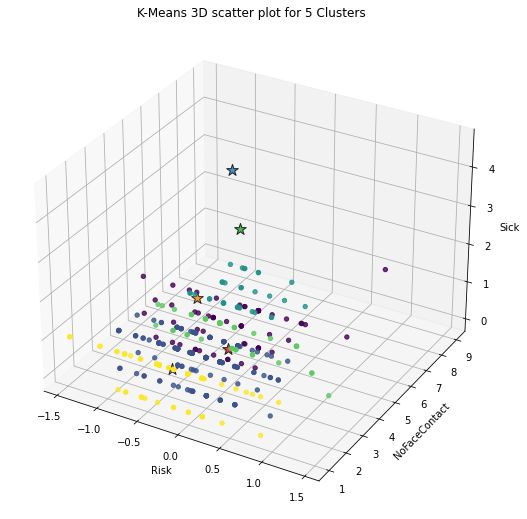

In [14]:
# Apply Clustering & Compute Dunn Index

num_clusters = 5 # num of clusters
Kmeans = KMeansClustering(X, num_clusters)
y_pred, centroids = Kmeans.fit(X)
print("Centroids: \n", centroids)

di5 = Kmeans.DunnIndex(X, centroids)
print("Dunn Index: %.4f" % di5)

#Display Scatter Plot
print("**Scatter Plot for %d Clusters**" % num_clusters)

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating plot
sctt = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],
                    alpha = 0.8,
                    c = y_pred,
                    marker ='.',
                   s=75)

for i in range(num_clusters):
    ax.scatter3D(centroids[i][0], centroids[i][1], centroids[i][1],
                    alpha = 0.8,
                    marker ='*',
                    s=150, edgecolor='black')

plt.title(f"K-Means 3D scatter plot for {num_clusters} Clusters")
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
 
# show plot
plt.show()

Centroids: 
 [[ 0.66755172  1.24137931  1.79310345]
 [ 0.09541221  2.30534351  1.29770992]
 [-0.54775     2.41666667  1.        ]
 [-0.17858442  4.58441558  0.92207792]
 [-0.21677778  2.28888889  0.        ]
 [-0.26575     1.          0.76470588]]
Dunn Index: 0.0864
**Scatter Plot for 6 Clusters**


C:\Users\Manasa\AppData\Local\Temp\ipykernel_19444\1233242894.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


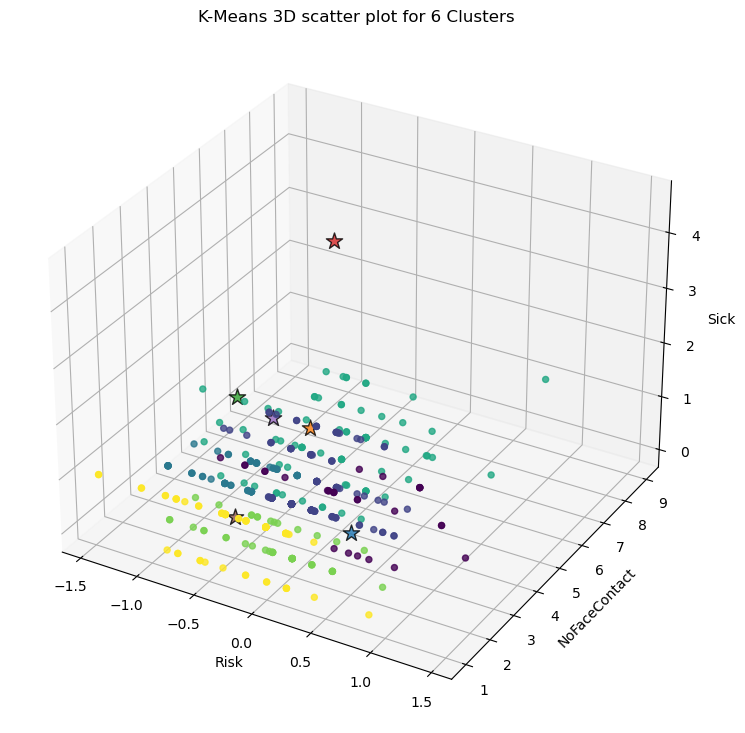

In [17]:
# Apply Clustering & Compute Dunn Index

num_clusters = 6 # num of clusters
Kmeans = KMeansClustering(X, num_clusters)
y_pred, centroids = Kmeans.fit(X)
print("Centroids: \n", centroids)

di6 = Kmeans.DunnIndex(X, centroids)
print("Dunn Index: %.4f" % di6)

#Display Scatter Plot
print("**Scatter Plot for %d Clusters**" % num_clusters)

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating plot
sctt = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],
                    alpha = 0.8,
                    c = y_pred,
                    marker ='.',
                   s=75)

for i in range(num_clusters):
    ax.scatter3D(centroids[i][0], centroids[i][1], centroids[i][1],
                    alpha = 0.8,
                    marker ='*',
                    s=150, edgecolor='black')

plt.title(f"K-Means 3D scatter plot for {num_clusters} Clusters")
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
 
# show plot
plt.show()

Centroids: 
 [[-0.09456923  3.          1.29230769]
 [-0.13912319  2.          0.76811594]
 [ 0.35138636  1.61363636  1.97727273]
 [-0.19305479  1.          0.78082192]
 [-0.15994118  5.11764706  0.67647059]
 [-0.34605     3.675       0.4       ]
 [ 0.042125    4.4375      2.        ]]
Dunn Index: 0.1206
**Scatter Plot for 7 Clusters**


/var/folders/cv/flgh8s7960bc7q380pyn0c6m0000gn/T/ipykernel_24767/894746382.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


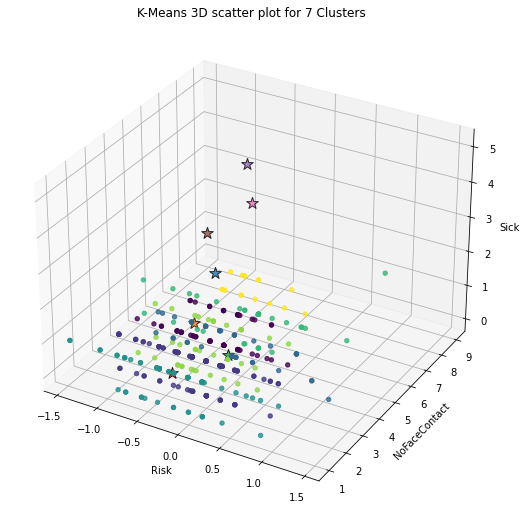

In [16]:
# Apply Clustering & Compute Dunn Index

num_clusters = 7 # num of clusters
Kmeans = KMeansClustering(X, num_clusters)
y_pred, centroids = Kmeans.fit(X)
print("Centroids: \n", centroids)

di7 = Kmeans.DunnIndex(X, centroids)
print("Dunn Index: %.4f" % di7)

#Display Scatter Plot
print("**Scatter Plot for %d Clusters**" % num_clusters)

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating plot
sctt = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],
                    alpha = 0.8,
                    c = y_pred,
                    marker ='.',
                   s=75)

for i in range(num_clusters):
    ax.scatter3D(centroids[i][0], centroids[i][1], centroids[i][1],
                    alpha = 0.8,
                    marker ='*',
                    s=150, edgecolor='black')

plt.title(f"K-Means 3D scatter plot for {num_clusters} Clusters")
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
 
# show plot
plt.show()

Centroids: 
 [[-8.81314286e-01  1.54285714e+00  6.28571429e-01]
 [-6.44166667e-03  2.00000000e+00  7.91666667e-01]
 [ 5.99190476e-01  1.19047619e+00  2.00000000e+00]
 [ 6.04571429e-02  3.65714286e+00  2.00000000e+00]
 [-5.38125000e-01  3.59375000e+00  1.25000000e-01]
 [-1.09647727e-01  3.90909091e+00  9.20454545e-01]
 [-3.85964912e-03  1.00000000e+00  8.24561404e-01]
 [ 6.47727273e-02  2.00000000e+00  2.00000000e+00]]
Dunn Index: 0.1153
**Scatter Plot for 8 Clusters**


/var/folders/cv/flgh8s7960bc7q380pyn0c6m0000gn/T/ipykernel_24767/3079284466.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


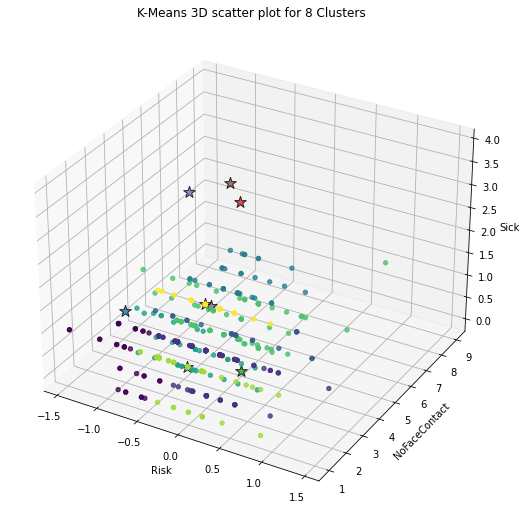

In [18]:
# Apply Clustering & Compute Dunn Index

num_clusters = 8 # num of clusters
Kmeans = KMeansClustering(X, num_clusters)
y_pred, centroids = Kmeans.fit(X)
print("Centroids: \n", centroids)

di8 = Kmeans.DunnIndex(X, centroids)
print("Dunn Index: %.4f" % di8)

#Display Scatter Plot
print("**Scatter Plot for %d Clusters**" % num_clusters)

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating plot
sctt = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],
                    alpha = 0.8,
                    c = y_pred,
                    marker ='.',
                   s=75)

for i in range(num_clusters):
    ax.scatter3D(centroids[i][0], centroids[i][1], centroids[i][1],
                    alpha = 0.8,
                    marker ='*',
                    s=150, edgecolor='black')

plt.title(f"K-Means 3D scatter plot for {num_clusters} Clusters")
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
 
# show plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Centroids: 
 [[        nan         nan         nan         nan         nan         nan]
 [-0.10386341  2.45609756  0.98780488  3.37073171  2.78536585 -0.32248537]
 [        nan         nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan         nan]]
Dunn Index: inf
**Scatter Plot for 9 Clusters**


C:\Users\Manasa\AppData\Local\Temp\ipykernel_19444\2590087996.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


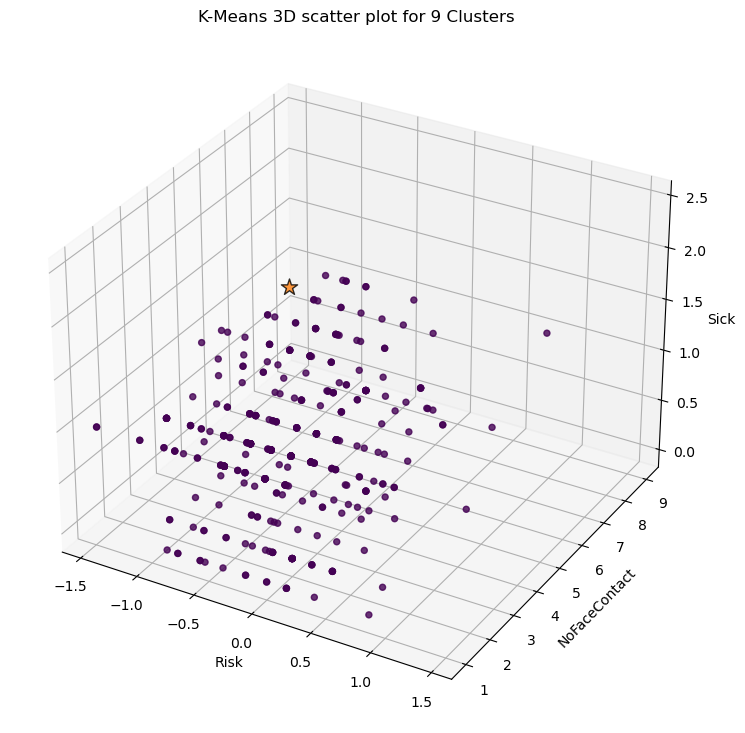

In [32]:
# Apply Clustering & Compute Dunn Index

num_clusters = 9 # num of clusters
Kmeans = KMeansClustering(X, num_clusters)
y_pred, centroids = Kmeans.fit(X)
print("Centroids: \n", centroids)

di9 = Kmeans.DunnIndex(X, centroids)
print("Dunn Index: %.4f" % di9)

#Display Scatter Plot
print("**Scatter Plot for %d Clusters**" % num_clusters)

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating plot
sctt = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],
                    alpha = 0.8,
                    c = y_pred,
                    marker ='.',
                   s=75)

for i in range(num_clusters):
    ax.scatter3D(centroids[i][0], centroids[i][1], centroids[i][1],
                    alpha = 0.8,
                    marker ='*',
                    s=150, edgecolor='black')

plt.title(f"K-Means 3D scatter plot for {num_clusters} Clusters")
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
 
# show plot
plt.show()

Centroids: 
 [[-1.80035714e-01  2.10714286e+00  9.82142857e-01  2.69642857e+00
   1.21428571e+00 -4.41232143e-01]
 [-3.26363636e-02  1.42424242e+00  1.03030303e+00  4.96969697e+00
   4.78787879e+00 -3.52545455e-01]
 [-1.04000000e-02  5.00000000e+00  1.06666667e+00  1.93333333e+00
   4.20000000e+00 -1.82000000e-01]
 [-3.52343750e-02  1.78125000e+00  1.12500000e+00  4.56250000e+00
   1.34375000e+00 -4.28953125e-01]
 [-4.65000000e-01  3.50000000e+00  7.08333333e-01  1.79166667e+00
   3.70833333e+00 -5.50000000e-01]
 [ 2.66666667e-03  2.31250000e+00  1.12500000e+00  4.52083333e+00
   3.72916667e+00 -2.86437500e-01]
 [-1.30228571e-01  1.84285714e+00  9.14285714e-01  2.32857143e+00
   4.22857143e+00 -3.10800000e-01]
 [ 7.08709677e-02  1.35483871e+00  8.70967742e-01  1.54838710e+00
   1.54838710e+00 -2.83225806e-02]
 [ 3.75238095e-02  4.61904762e+00  1.00000000e+00  4.61904762e+00
   4.33333333e+00 -1.47761905e-01]
 [-2.46895833e-01  3.95833333e+00  9.37500000e-01  3.70833333e+00
   1.3333333

C:\Users\Manasa\AppData\Local\Temp\ipykernel_19444\1284216147.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


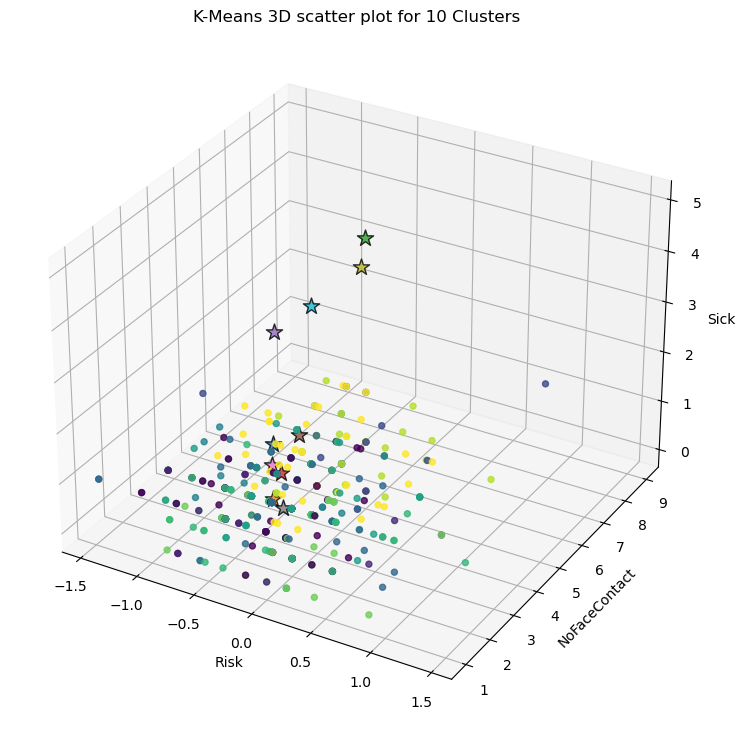

In [33]:
# Apply Clustering & Compute Dunn Index

num_clusters = 10 # num of clusters
Kmeans = KMeansClustering(X, num_clusters)
y_pred, centroids = Kmeans.fit(X)
print("Centroids: \n", centroids)

di10 = Kmeans.DunnIndex(X, centroids)
print("Dunn Index: %.4f" % di10)

#Display Scatter Plot
print("**Scatter Plot for %d Clusters**" % num_clusters)

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating plot
sctt = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],
                    alpha = 0.8,
                    c = y_pred,
                    marker ='.',
                   s=75)

for i in range(num_clusters):
    ax.scatter3D(centroids[i][0], centroids[i][1], centroids[i][1],
                    alpha = 0.8,
                    marker ='*',
                    s=150, edgecolor='black')

plt.title(f"K-Means 3D scatter plot for {num_clusters} Clusters")
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
 
# show plot
plt.show()

In [34]:
# num of clusters list
K_list = [2,3,4,5,6,7,8,9,10]

# List to store dunn_index_values
dinn_indices_list = [di2, di3, di4, di5, di6, di7 ,di8, di9, di10]

# Num of Clusters size (X-axis) vs Dunn Index (y-axis))
plt.plot(K_list, dinn_indices_list, color ='b', linewidth ='2')
plt.scatter(K_list, dinn_indices_list, c='red')
plt.xlabel("Num of Clusters")
plt.ylabel("Dunn Index")
plt.title("Num of Clusters vs Dunn Index")
plt.show()

NameError: name 'di3' is not defined

### 2. K-means clustering with different features (20 points):

a. Based on the best number of clusters you obtained in problem 1c and the 3 features, does adding the ‘HndWshFreq’ (total 4 features) improve the clustering results? Use validity measures to justify your response.

In [20]:
# Get data for given attributes alone
X2 = data.loc[:, ['Risk', 'NoFaceContact', 'Sick', 'HndWshFreq']]
X = X2.values

print("Dimensions of X: ", X.shape)

Dimensions of X:  (410, 4)


In [21]:
# Apply Clustering & Compute Dunn Index

num_clusters = 2 # num of clusters
Kmeans = KMeansClustering(X, num_clusters)
y_pred, centroids = Kmeans.fit(X)
print("Centroids: \n", centroids)

di = Kmeans.DunnIndex(X, centroids)
print("Dunn Index: %.4f" % di)

Centroids: 
 [[-0.07242211  1.68341709  0.98994975  2.52261307]
 [-0.13351659  3.18483412  0.98578199  3.89099526]]
Dunn Index: 0.2380


b. Based on the model in problem 2a, does adding the ‘HndWshQual’ (total 5 features) improve the clustering results? Use validity measures to justify your response.

In [22]:
# Get data for given attributes alone
X3 = data.loc[:, ['Risk', 'NoFaceContact', 'Sick', 'HndWshFreq', 'HndWshQual']]
X = X3.values

print("Dimensions of X: ", X.shape)

Dimensions of X:  (410, 5)


In [23]:
# Apply Clustering & Compute Dunn Index

num_clusters = 2 # num of clusters
Kmeans = KMeansClustering(X, num_clusters)
y_pred, centroids = Kmeans.fit(X)
print("Centroids: \n", centroids)

di = Kmeans.DunnIndex(X, centroids)
print("Dunn Index: %.4f" % di)

Centroids: 
 [[-0.13257005  3.03864734  0.97101449  3.94202899  4.352657  ]
 [-0.07459113  1.86206897  1.00492611  2.49753695  3.408867  ]]
Dunn Index: 0.2266


### 3. Fuzzy C-means clustering (40 points):

In [24]:
class FuzzyCMeansClustering:
    #n = number of examples
    #k = number of clusters
    #d = dimension of features
    #m = fuzzy parameter

    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.n, self.d = X.shape # num of examples, num of features
        self.m = 1.7 #parameter

    #Initializing Membership Matrix (wij values are assigned randomly).
    def initializeMembershipMatrix(self):
        membership_mat = np.array(np.random.dirichlet(np.ones(self.K),self.n))
        return membership_mat

    #Calculating Cluster Center
    def calculateClusterCenter(self, membership_mat, X): # calculating the cluster center
        cluster_centers = []
        for i in range(self.K):
            summation = np.power(membership_mat[:,i],self.m).sum()
            centers = []
            for x in range(self.d):
                numer = (X.T[x] * np.power(membership_mat[:,i],self.m)).sum()
                cluster_center = numer/summation;
                centers.append(cluster_center)
            cluster_centers.append(centers)
        return cluster_centers

    #Updating Membership Value
    def updateMembershipValue(self, membership_mat, cluster_centers, X): # Updating the membership value
        den = np.zeros(self.n)
        for i in range(self.K):
            temp = (X - cluster_centers[i])**2
            temp = np.sum(temp, axis=1)
            temp = np.sqrt(temp)
            den  = den + np.power(1/temp,1/(self.m-1))

        for i in range(self.K):
            temp = (X - cluster_centers[i])**2
            temp = np.sum(temp, axis=1)
            temp = np.sqrt(temp)
            membership_mat[:,i] = np.divide(np.power(1/temp,1/(self.m-1)),den)
        return membership_mat

    # getting the clusters
    def getClusters(self, membership_mat): 
        cluster_labels = list()
        for i in range(self.n):
            max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
            cluster_labels.append(idx)
        return cluster_labels

    #Fit Model
    def fit(self, X): #First Iteration with centers at 0
        # Membership Matrix
        membership_mat = self.initializeMembershipMatrix()
        for z in range(self.max_iterations):
            cluster_centers = self.calculateClusterCenter(membership_mat, X)
            membership_mat = self.updateMembershipValue(membership_mat, cluster_centers, X)
            cluster_labels = self.getClusters(membership_mat)
        return cluster_labels, cluster_centers

    # Function to find euclidean distance between two points 
    def findDistance(self, point1, point2):
        eucDis = 0
        for i in range(len(point1)):
            eucDis = eucDis + (point1[i] - point2[i])**2
        return eucDis**0.5

    # Function to calcualte Dunn Index
    def DunnIndex(self, points, cluster):

        # points -- all data points
        # cluster -- cluster centroids
        numer = float('inf')
        for c in cluster: # for each cluster
            for t in cluster: # for each cluster
                if (t == c): continue # if same cluster, ignore
                ndis = self.findDistance(t, c)
                numer = min(numer, ndis) # find distance between centroids
        denom = 0
        for c in cluster: # for each cluster
            for p in points: # for each point
                for t in points: # for each point
                    if (t == p).all(): continue # if same point, ignore
                    ddis = self.findDistance(t, p)
                    denom = max(denom, ddis)

        return numer/denom

a. Implement Fuzzy C-means and apply it with the best number of clusters you selected in problem 1 and the best combination of features you selected in problem 2. Was there any difference in the clusters as compared to the k-means clusters? (Compare using visualization tools, using centroid values, OR using some labels and observing the differences).

b. Harden the cluster assignment of Fuzzy C-means and use DI index to compare it with the k- means clustering result. Which clustering algorithm do you think produces better clusters and why?

In [25]:
X1 = data.loc[:, ['Risk', 'NoFaceContact', 'Sick']]
X = X1.values

print("Dimensions of X: ", X.shape)

Dimensions of X:  (410, 3)


In [26]:
# Apply Clustering & Compute Dunn Index
num_clusters = 2 # num of cluster
fc_means = FuzzyCMeansClustering(X, num_clusters)
cluster_labels, cluster_centers = fc_means.fit(X)
print("Cluster Centers:\n", cluster_centers)

di = fc_means.DunnIndex(X, cluster_centers)
print(f"Dunn Index of Fuzzy C-Meamns for {num_clusters} Clusters = %.4f" % di)

Cluster Centers:
 [[-0.1363511379577109, 3.304907361905193, 0.9926197731159272], [-0.08568007478636439, 1.9014797127917176, 0.9849383267622315]]
Dunn Index of Fuzzy C-Meamns for 2 Clusters = 0.1691


**Scatter Plot for 2 Clusters**


C:\Users\Manasa\AppData\Local\Temp\ipykernel_19444\27649704.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


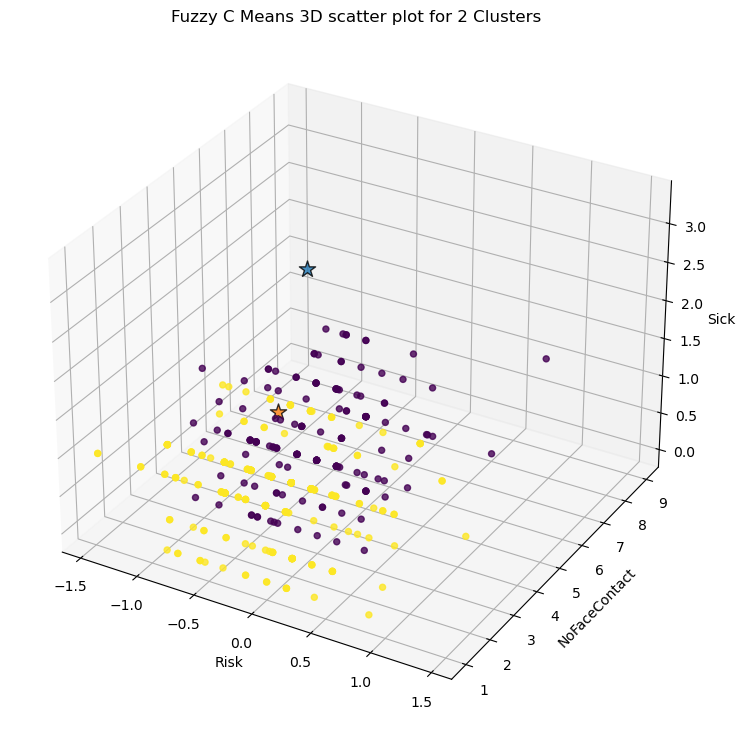

In [27]:
#Display Scatter Plot
print("**Scatter Plot for %d Clusters**" % num_clusters)

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating plot
sctt = ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],
                    alpha = 0.8,
                    c = cluster_labels,
                    marker ='.',
                   s=75)

for i in range(num_clusters):
    ax.scatter3D(cluster_centers[i][0], cluster_centers[i][1], cluster_centers[i][1],
                    alpha = 0.8,
                    marker ='*',
                    s=150, edgecolor='black')

plt.title(f"Fuzzy C Means 3D scatter plot for {num_clusters} Clusters")
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
 
# show plot
plt.show()

c. Add one more feature into the model in problem 3a. Does adding this new feature improve the clustering results? If so, why or why not? Note: If you play with different features for 3 c, please mention that as well as the features you experimented and why you chose that particular additional feature.


In [28]:
# Get data for given attributes alone
X2 = data.loc[:, ['Risk', 'NoFaceContact', 'Sick', 'Vaccin']]
X = X2.values

print("Dimensions of X: ", X.shape)

print("Dimensions of X: ", X.shape)

# Apply Clustering & Compute Dunn Index
num_clusters = 2 # num of cluster
fc_means = FuzzyCMeansClustering(X, num_clusters)
cluster_labels, cluster_centers = fc_means.fit(X)
print("Cluster Centers:\n", cluster_centers)

di = fc_means.DunnIndex(X, cluster_centers)
print(f"Dunn Index of Fuzzy C-Meamns for {num_clusters} Clusters = %.4f" % di)

Dimensions of X:  (410, 4)
Dimensions of X:  (410, 4)
Cluster Centers:
 [[-0.12899265225496173, 2.4252588382232503, 0.9509797219766872, 2.912052715447868], [-0.07892297817157222, 2.470390513465853, 1.0250453888625717, 3.825812998162268]]
Dunn Index of Fuzzy C-Meamns for 2 Clusters = 0.0852


In [29]:
# Get data for given attributes alone
X3 = data.loc[:, ['Risk', 'NoFaceContact', 'Sick', 'Vaccin', 'HandSanit']]
X = X3.values

print("Dimensions of X: ", X.shape)

print("Dimensions of X: ", X.shape)

# Apply Clustering & Compute Dunn Index
num_clusters = 2 # num of cluster
fc_means = FuzzyCMeansClustering(X, num_clusters)
cluster_labels, cluster_centers = fc_means.fit(X)
print("Cluster Centers:\n", cluster_centers)

di = fc_means.DunnIndex(X, cluster_centers)
print(f"Dunn Index of Fuzzy C-Meamns for {num_clusters} Clusters = %.4f" % di)

Dimensions of X:  (410, 5)
Dimensions of X:  (410, 5)
Cluster Centers:
 [[-0.10384876209425244, 2.4561219756898525, 0.9877998687806815, 3.3706389982056124, 2.786734089073723], [-0.10387806340491201, 2.456073079276809, 0.9878098965102002, 3.3708244214745373, 2.7839977556201494]]
Dunn Index of Fuzzy C-Meamns for 2 Clusters = 0.0003


In [30]:
# Get data for given attributes alone
X4 = data.loc[:, ['Risk', 'NoFaceContact', 'Sick', 'Vaccin', 'HandSanit', 'Complications']]
X = X4.values

print("Dimensions of X: ", X.shape)

print("Dimensions of X: ", X.shape)

# Apply Clustering & Compute Dunn Index
num_clusters = 2 # num of cluster
fc_means = FuzzyCMeansClustering(X, num_clusters)
cluster_labels, cluster_centers = fc_means.fit(X)
print("Cluster Centers:\n", cluster_centers)

di = fc_means.DunnIndex(X, cluster_centers)
print(f"Dunn Index of Fuzzy C-Meamns for {num_clusters} Clusters = %.4f" % di)

Dimensions of X:  (410, 6)
Dimensions of X:  (410, 6)
Cluster Centers:
 [[-0.10386316296033801, 2.4560979021803684, 0.9878048116873385, 3.370730143740119, 2.785386078071989, -0.32248506721205616], [-0.10386366630717644, 2.4560972197572815, 0.9878049444118814, 3.3707332708946365, 2.785345629276164, -0.3224856644969979]]
Dunn Index of Fuzzy C-Meamns for 2 Clusters = 0.0000
